In [2]:
#importing libraries
import os
import cv2
import matplotlib.pyplot as plt
import random
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Flatten,Conv2D
from tensorflow.keras.layers import BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


C:\Users\91996\anaconda 3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\91996\anaconda 3\lib\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


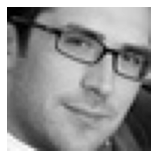

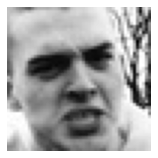

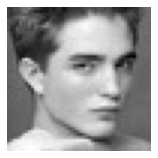

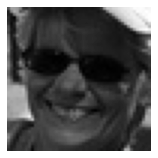

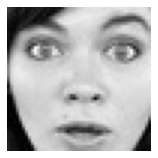

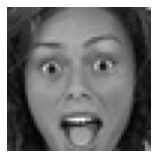

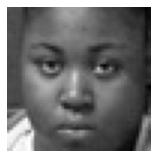

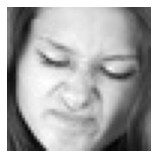

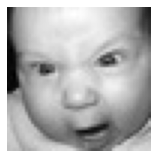

In [4]:
from skimage.io import imread_collection
col_dir =  r'C:\Users\91996\Desktop\Emotion_detection\train\**\*.jpg'
col = imread_collection(col_dir
                       )
for i in range(9):
    img=random.choice(col)
    plt.figure(figsize=(9,9))
    plt.subplot(331+i)
    plt.imshow(img,cmap='gray');plt.axis('off')


In [5]:

img_size=48
batch_size=64
gentrain=ImageDataGenerator()
traingen=gentrain.flow_from_directory(directory=r'C:\Users\91996\Desktop\Emotion_detection\train',
                                      batch_size=batch_size,
                                      target_size=(img_size,img_size),
                                      color_mode='grayscale',
                                      class_mode="categorical",
                                      shuffle=True)
gentest=ImageDataGenerator()
testgen=gentrain.flow_from_directory(directory=r'C:\Users\91996\Desktop\Emotion_detection\test',
                                      batch_size=batch_size,
                                      target_size=(img_size,img_size),
                                      color_mode='grayscale',
                                      class_mode="categorical",
                                      shuffle=True)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
#definingg the model
def Convolution(input_img,filters,kernel_size):
    x=Conv2D(filters=filters,kernel_size=kernel_size,padding='same')(input_img)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=MaxPooling2D(pool_size=(2,2))(x)
    x=Dropout(0.25)(x)
    
    return x


In [7]:
def dense_f(input_img,nodes):
    x=Dense(nodes)(input_img)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Dropout(0.25)(x)
    
    return x


In [8]:
def model_fer(input_shape):
    Inputs=Input(input_shape)
    conv_1=Convolution(Inputs,32,(3,3))
    conv_2=Convolution(Inputs,64,(3,3))
    conv_3=Convolution(Inputs,128,(3,3))
    
    flatten=Flatten()(conv_3)
    dense1=dense_f(flatten,256) 
    output=Dense(7,activation='softmax')(dense1)
    model=Model(inputs=[Inputs],outputs=[output])
    model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics='Accuracy')
    return model


In [9]:
model=model_fer((48,48,1))
model.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_2 (Bat  (None, 48, 48, 128)       512       
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 128)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 24, 24, 128)       0  

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [11]:
epochs=15
steps_per_epoch=traingen.n//traingen.batch_size
validation_steps=testgen.n//testgen.batch_size
checkpoint=ModelCheckpoint("model_weights.weights.h5",monitor='val_accuracy',verbose=1,save_weights_only=True,mode='max',save_freq='epoch')
callbacks=[checkpoint]

In [12]:
clf=model.fit(x=traingen,steps_per_epoch=steps_per_epoch,epochs=epochs,
              validation_data=testgen,validation_steps=validation_steps,
             callbacks=callbacks)

Epoch 1/15


448/448 [==============================] - ETA: 0s - loss: 1.6558 - Accuracy: 0.3753
Epoch 1: saving model to model_weights.weights.h5
448/448 [==============================] - 243s 533ms/step - loss: 1.6558 - Accuracy: 0.3753 - val_loss: 1.9922 - val_Accuracy: 0.2612
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.3482 - Accuracy: 0.4876
Epoch 2: saving model to model_weights.weights.h5
448/448 [==============================] - 235s 524ms/step - loss: 1.3482 - Accuracy: 0.4876 - val_loss: 1.5740 - val_Accuracy: 0.4015
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 1.1908 - Accuracy: 0.5566
Epoch 3: saving model to model_weights.weights.h5
448/448 [==============================] - 243s 542ms/step - loss: 1.1908 - Accuracy: 0.5566 - val_loss: 1.6098 - val_Accuracy: 0.3951
Epoch 4/15
448/448 [==============================] - ETA: 0s - loss: 1.0550 - Accuracy: 0.6112
Epoch 4: saving model to model_weights.weights.h5
448/448 [

In [14]:
model.evaluate(testgen)

113/113 [==============================] - 10s 88ms/step - loss: 2.5910 - Accuracy: 0.3966


[2.5909736156463623, 0.39662858843803406]

In [15]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)